# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Importing file from drive
from google.colab import drive
drive.mount('/content/drive')
visa=pd.read_csv('/content/drive/MyDrive/BaggingnRandomForest/EasyVisa.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Displaying the First 5 rows in the dataset
visa.head(5)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
#Displaying the last 5 rows of the Dataset
visa.tail(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
# Determining the shape of the Dataset
visa.shape

(25480, 12)

**Observation:**
There are 25480 Columns & 12 Columns

In [ ]:
#Details of the datatypes in the dataset
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observation:**

1) There are 12 columns of which 9 are of Object Type, 2 are of Integer type & 1 is of Float Type.

2) There are no missing values in the dataset.

**Converting Object datatype to categorical datatype**

In [ ]:
cols=visa.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
  visa[i]=visa[i].astype('category')

In [ ]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


**Observation:** Object datatype has been converted to category datatype.

**Statistical Summnary**

In [ ]:
visa.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observation:**

1) **No. of employees**:The average no. of employees in the employer organization is 5667 & states the minimum value as -26 which needs to be checked.The median is greater than the averge value & hence there will be outliers here.

2) **yr_of_estab**: Almost 50% of the companies were established by 1997.

3) **prevailing_wage**: The averge prevailing wage is 74455.8 & 75% of the prevailing wage falls below 107735.5125.

All 3 columns have a high range.

In [ ]:
visa.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


**Observation:**

1) case_status is the target variable with 67% records 'certified' implying employee will have their visa approved.

2) Majority of the employees applying for visa approval have a Bachelor's degree.

3) Majority of the employees applying for visa approval are from Asia.

4) Majority of the employees applying for visa approval have their intended region of employment is Northeast of America.

5) Majority of the employees applying for visa approval is for a full time position.

6) Majority of the employees applying for visa approval have job experience & donot require job training for the role.

7) case_id is a unique column & can be dropped.

In [ ]:
# Dropping case_id columns from the dataset.
visa.drop(['case_id'],axis=1,inplace=True)

In [ ]:
#Copying dataset to df
df=visa.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### **Univariate Analysis**

**Observation on Continent**

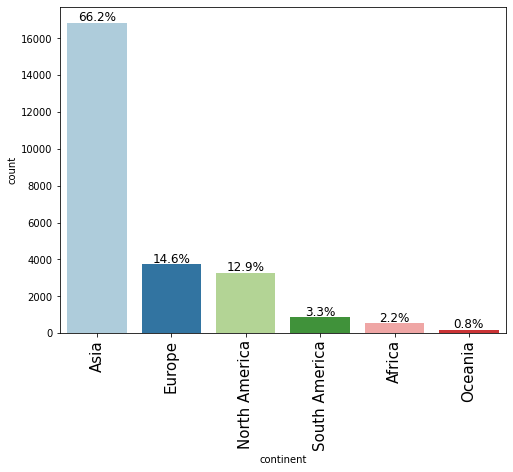

In [ ]:
labeled_barplot(df,'continent',perc=True)

**Observation:**

1) 66.2% of employees from Asia are applying for US visa approval followed by Europe at 14.6%

2) The least contribution is from Oceania which is at 0.8%

**Observation on Education of Employees**

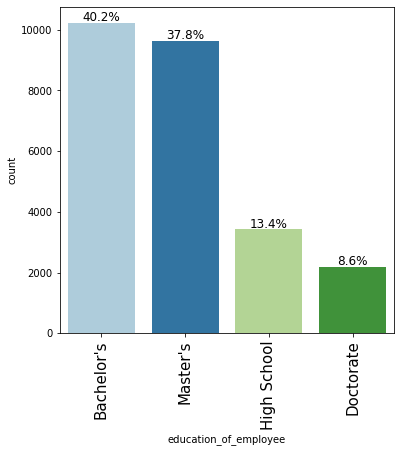

In [ ]:
labeled_barplot(df,'education_of_employee',perc=True)

**Observation:**

1) 40.2% of employees applying for the visa have a Bachelor's degree followed by Master's degree at 37.8%

2) Only 8.6% of the employees applying for the US visa have a Doctorate degree which is the least.

**Observation on Job Experience**

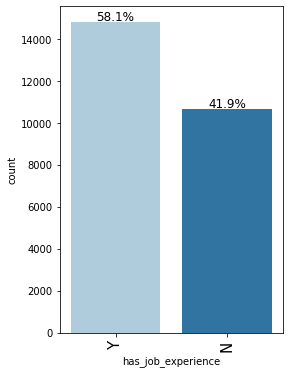

In [ ]:
labeled_barplot(df,'has_job_experience',perc=True)

**Observation:**

58.1% of the employee applications have job experience while 41.9% of the employees donot have job experience.

**Observation on Job Training Requirement**

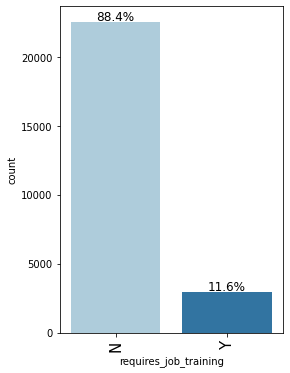

In [ ]:
labeled_barplot(df,'requires_job_training',perc=True)

**Observation:**
88.4% of the employees donot require job training while 11.6% of the employees applying for visa need job training.

**Observation on Region of Employment**

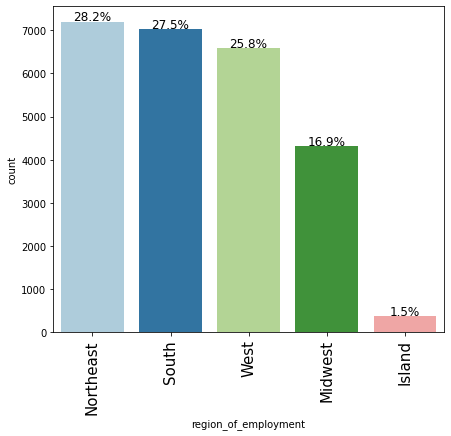

In [ ]:
labeled_barplot(df,'region_of_employment',perc=True)

**Observation:**

1) 28.2% of the employees who are applying for visa have their intended region of employment as Northeast followed by South which is at 27.5%

2) Only 1.5% of the employees intended region of employment is Island.

**Observation on Unit of Wage**

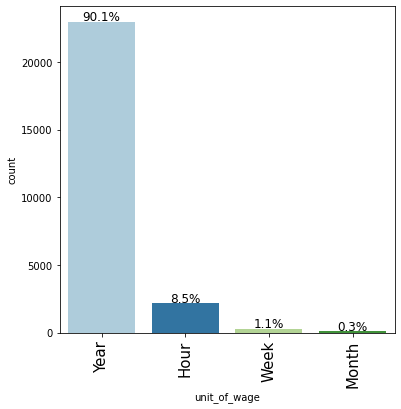

In [ ]:
labeled_barplot(df,'unit_of_wage',perc=True)

**Observation:**
 90.1% of unit of prevailing wage is Yearly followed by Hourly at 8.5%

**Observation on Full Time Position**

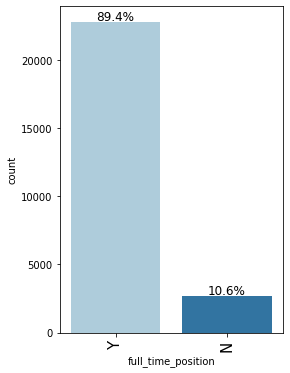

In [ ]:
labeled_barplot(df,'full_time_position',perc=True)

**Observation:**
89.4% of the employees applying for visa is for Full time Position while  10.6% are not for full time position.

**Observation on Case Status**

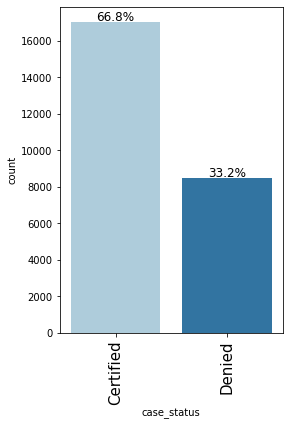

In [ ]:
labeled_barplot(df,'case_status',perc=True)

**Observation:**
66.8% of the applications were certified while 33.2% of the applications were denied.

**Observation on No. of Employees**

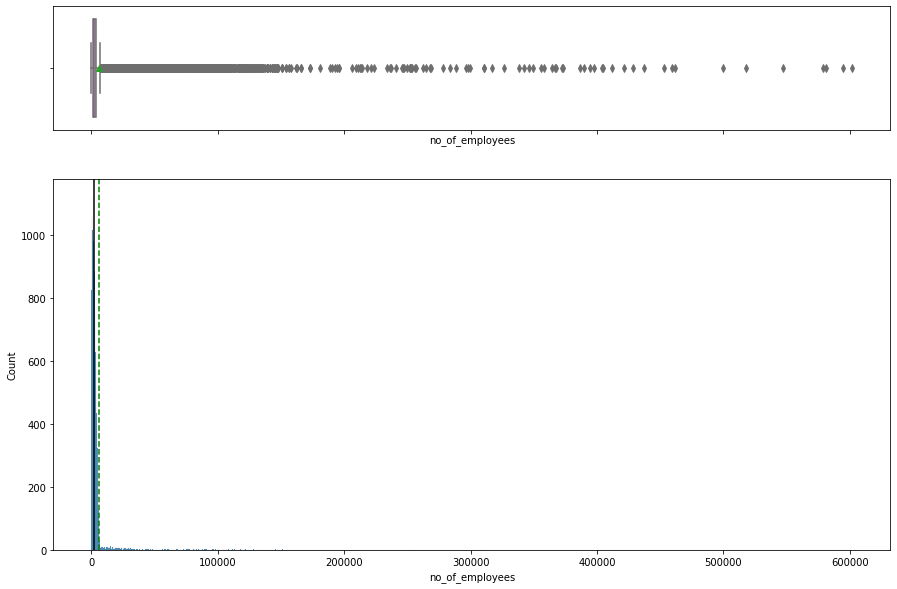

In [ ]:
histogram_boxplot(df,'no_of_employees')

**Observation:**

1) The data contains a lot of outliers & is severly right skewed.

2) Need to check the values less than 0.


In [ ]:
#Extrcating columns where no of employees < 0
df.loc[df['no_of_employees']< 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


This might be a error in data entry & hence will take the absolute value.

In [ ]:
df.no_of_employees=abs(df.no_of_employees)
df.loc[df['no_of_employees']< 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


There are no entries with no of employees < 0.

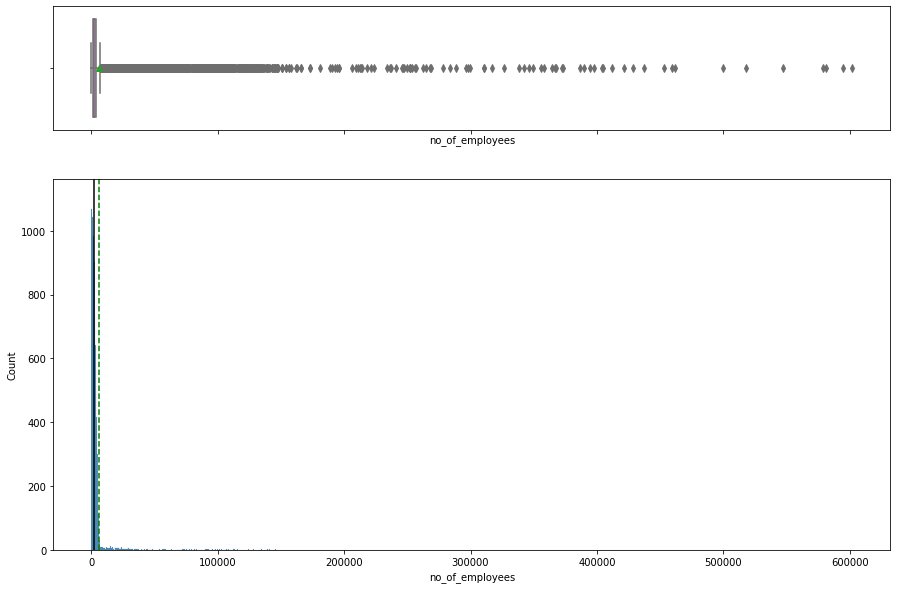

In [ ]:
histogram_boxplot(df,'no_of_employees')

Observation:

1) The data contains a lot of outliers.

**Observation on Prevailing Wage**

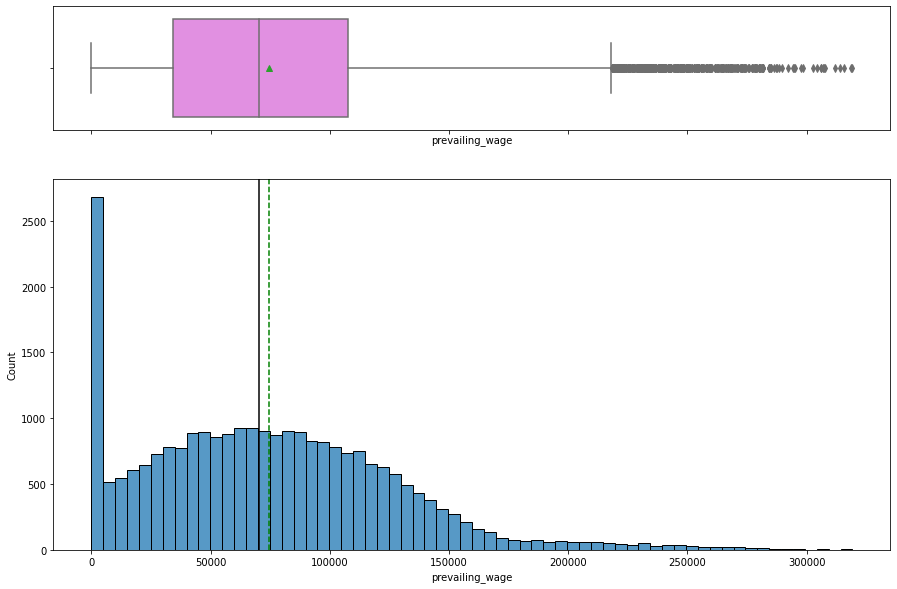

In [ ]:
histogram_boxplot(df,'prevailing_wage')

**Observation:**

1) The data is right skewed with lots of outliers.

2) Since the prevailing wage unit is also in hours we see a spike at 0 to 5000.

In [ ]:
df.loc[df['prevailing_wage']<100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
df.loc[df['prevailing_wage']<100,'unit_of_wage'].value_counts()

Hour     176
Month      0
Week       0
Year       0
Name: unit_of_wage, dtype: int64

## **Bivariate Analysis**

**Visa Status across Continents**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


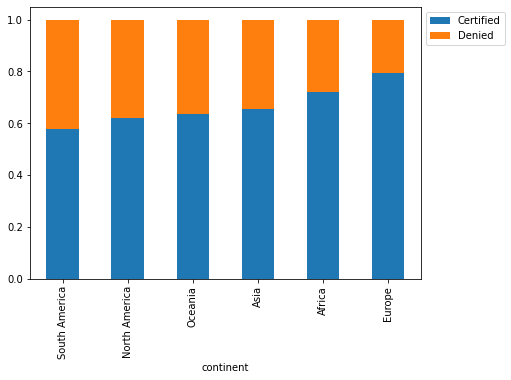

In [ ]:
stacked_barplot(df,'continent','case_status')

**Observation:**
It can be seen that majority of the applications for visa approval from Europe are approved while the least approval is from South America.

**Visa Status against Work Experience**

has_job_experience      N      Y    All
case_status                            
All                 10678  14802  25480
Certified            5994  11024  17018
Denied               4684   3778   8462
------------------------------------------------------------------------------------------------------------------------


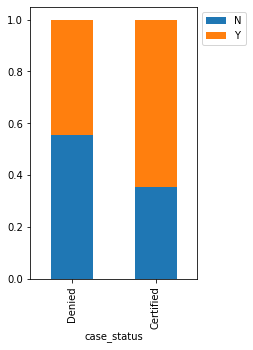

In [ ]:
stacked_barplot(df,'case_status','has_job_experience')

**Observation:**

1) It can be seen that majority of visa is approved for those who have work experience than those who do not.

2) Nearly ~58% of applications without experience are denied.

**Visa status against Prevailing Wage**

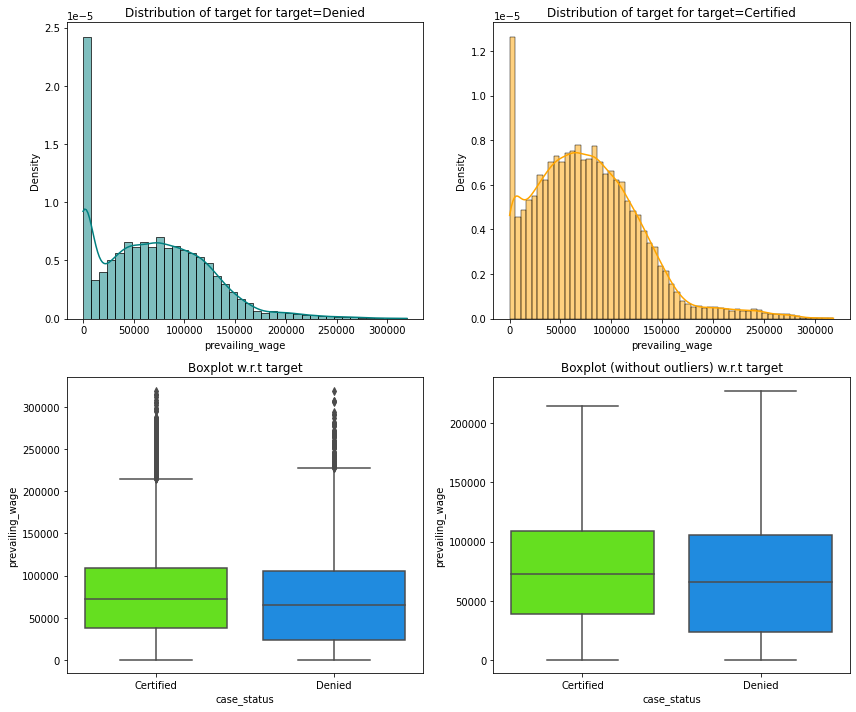

In [ ]:
distribution_plot_wrt_target(df,'prevailing_wage','case_status')

**Observation:**
It can be seen that the range of prevailing wage for those denied is larger than that for those certified by a small margin.

**Visa Status against Unit of Wage**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


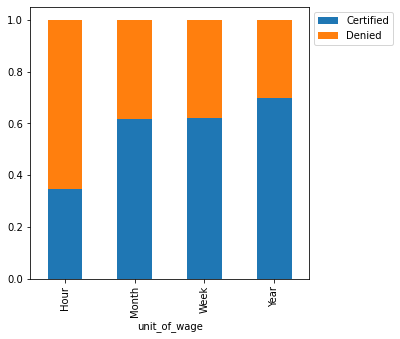

In [ ]:
stacked_barplot(df,'unit_of_wage','case_status')

**Observation:**

1) Employees who are of the hourly paid are more prone to rejection of the visa while the least is for yearly.

2) The rejection of the visa is same for Monthly & Weekly paid prevailing wage of employees.

**Visa Status against Education**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


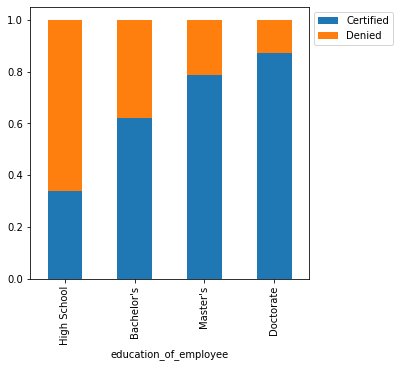

In [ ]:
stacked_barplot(df,'education_of_employee','case_status')

**Observation:**
 Visa Applications of  those employees who have only completed their High School are maximum denied while the least is for those having their Doctorate.

**Visa Status against Job Experience**

has_job_experience      N      Y    All
case_status                            
All                 10678  14802  25480
Certified            5994  11024  17018
Denied               4684   3778   8462
------------------------------------------------------------------------------------------------------------------------


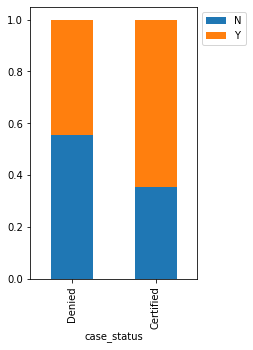

In [ ]:
stacked_barplot(df,'case_status','has_job_experience')

**Observation:**

1) Predominantly, for those employees who have job experience,their visa certification is high & at ~65%.

2) While, for those employees who have no job experience, their visa certification is low & at ~35%.

**Visa Status against Job Training Requirement**

requires_job_training      N     Y    All
case_status                              
All                    22525  2955  25480
Certified              15012  2006  17018
Denied                  7513   949   8462
------------------------------------------------------------------------------------------------------------------------


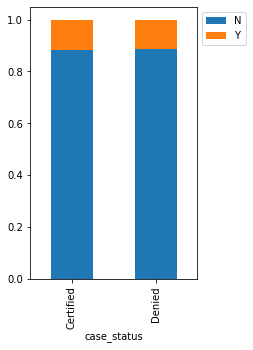

In [ ]:
stacked_barplot(df,'case_status','requires_job_training')

**Observation:**
  There isnt any difference in the visa approval in regards to job training requirement.

**Visa Status against Type of Employment Position**

full_time_position     N      Y    All
case_status                           
All                 2707  22773  25480
Certified           1855  15163  17018
Denied               852   7610   8462
------------------------------------------------------------------------------------------------------------------------


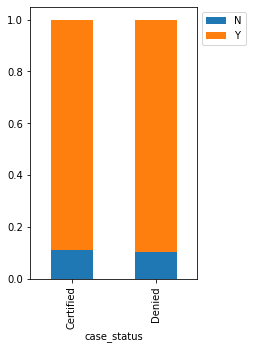

In [ ]:
stacked_barplot(df,'case_status','full_time_position')

**Observation:**

There is no difference in the approval & denial of visa application with regards to the type of position the employee is offered by the employer.

**Visa Status  against Region of Employment**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


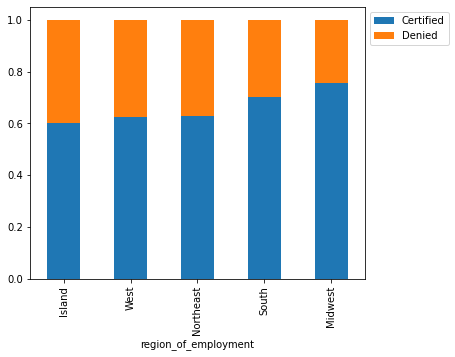

In [ ]:
stacked_barplot(df,'region_of_employment','case_status')

**Observation:**

1) It can be seen that visa applications with the intended region of employment being MidWest has a higher certification rate closely followed by the South region.

2) The least conversion to visa certification are for those employees who have their intended region of employment as Island.

**Prevailing wage against Region of Employment**

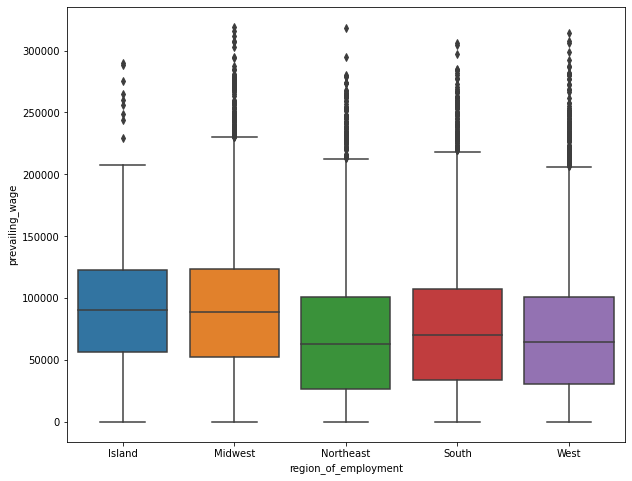

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,y='prevailing_wage',x='region_of_employment')
plt.show()

**Observation:**

1) The prevailing wage range is higher in the region of Midwest in comparison to other regions.

2)Prevailing wage in all regions is lesser than 75% of that in Island & Midwest regions.

**Region of Employment against Education**

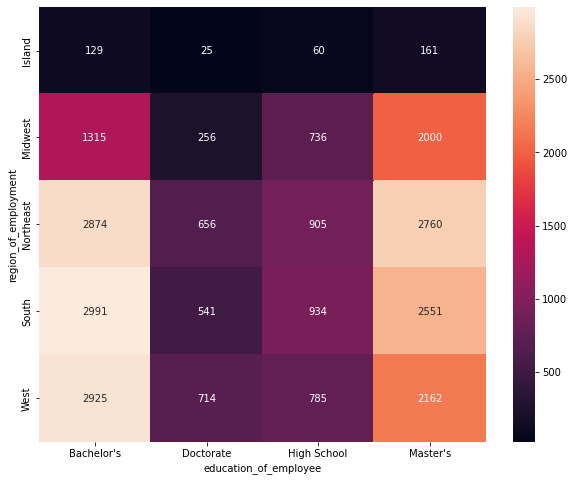

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df.region_of_employment,df.education_of_employee),annot=True,fmt="g")
plt.show()

**Observation:**

1) Predominantly, maximum employees with Bachelor's education are in South region & the least is for Island region.

2) Whereas, the maximum employees with Master's education are in Northeast region and least is for Island region.


## **Multivariate Analysis**

In [ ]:
col_list=df.select_dtypes(include=np.number).columns.tolist()
col_list


['no_of_employees', 'yr_of_estab', 'prevailing_wage']

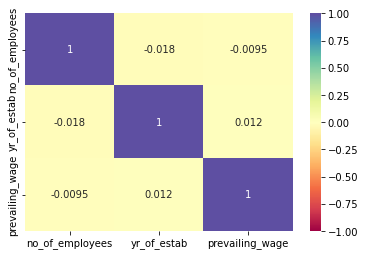

In [ ]:
sns.heatmap(df[col_list].corr(),annot=True,vmin=-1,vmax=1,cmap='Spectral')

**Observation:**
There is no correlation amongst the numerical columns.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Outlier Check**

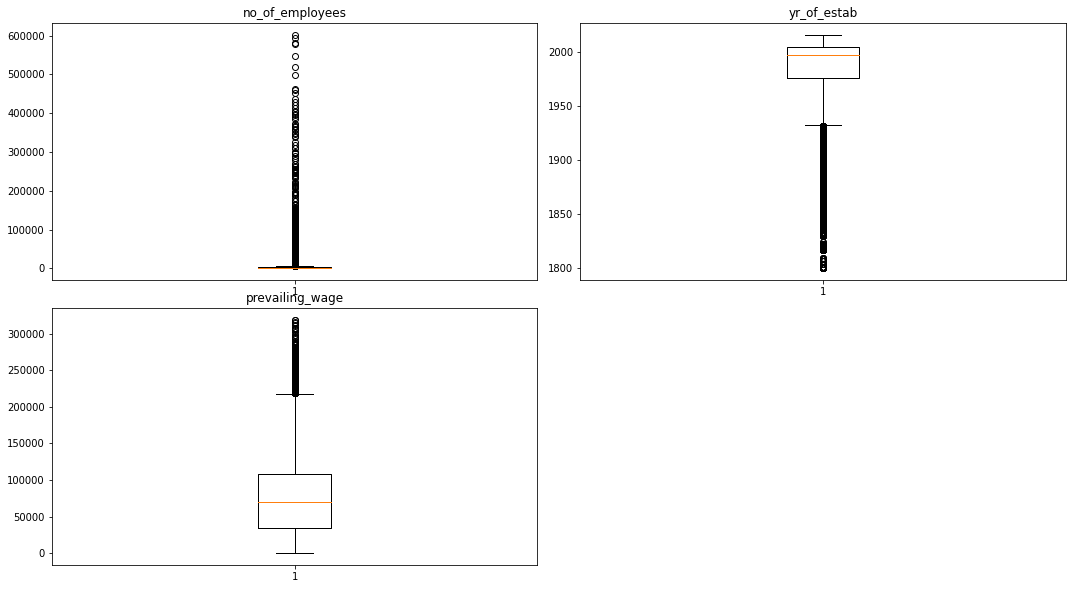

In [ ]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(col_list):
    plt.subplot(3, 2, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation:**
 There are outliers present in the data but they are proper values & we will not treat them.

In [ ]:
df.case_status.value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

### **Data Preperation**

In [ ]:
df.case_status=df['case_status'].apply(lambda x : 0 if x=='Denied' else 1)
X=df.drop(['case_status'],axis=1)
y=df.case_status
X=pd.get_dummies(X,drop_first=True)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [ ]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [ ]:
y_train.value_counts(1)

1    0.667919
0    0.332081
Name: case_status, dtype: float64

In [ ]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Definng function to create confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Model Building**

**Model evaluation criterion**

Model can make wrong predictions as:

Predicting an employee will be certified and the employee gets denied.
Predicting an employee will be denied and the employee gets certified.

Which is more important?

Here both cases are important as
 - If the visa is certified for an employee who doesn't have the required qualifications, a US citizen will be loosing a job opportunity.
 - If the visa is denied for an employee who has the required qualifications, then there will be loss of human resource who could have contributed to the economy.

 How to reduce the loss?

 Here we will monitor the F1 score to ensure there is a balnce between the False Negative & False Positive.

## Building Bagging models

**Decision Tree**

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.67},random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

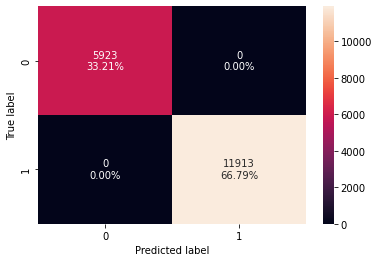

In [ ]:
confusion_matrix_sklearn(dtree, X_train, y_train)

Confusion Matrix -

Employee US visa certified and the model predicted it correctly that is employee will have US visa approved  : True Positive (observed=1,predicted=1)

Employee US visa rejected and the model predicted employee US vis will be approved: False Positive (observed=0,predicted=1)

Employee US Visa rejected and the model predicted employee visa will be rejected : True Negative (observed=0,predicted=0)

Employee US visa approved and the model predicted that employee visa will be rejected : False Negative (observed=1,predicted=0)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


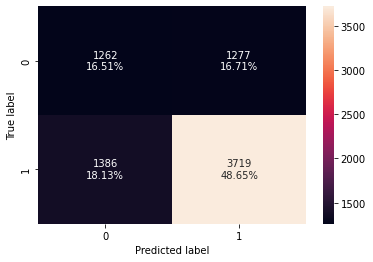

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [ ]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.651622  0.728501   0.744396  0.736363


Decision tree is overfitting on the training data.

**Bagging Classifier**

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

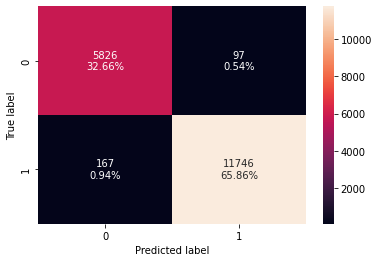

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


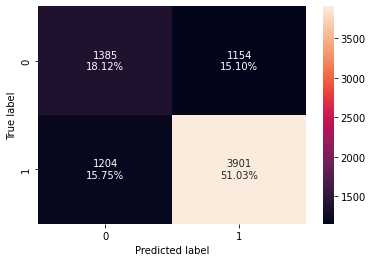

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


Bagging classifier is overfitting on the training set and is performing poorly on the test set.

**Bagging Classifier with class weights**

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.67},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.67},
                                                        random_state=1),
                  random_state=1)

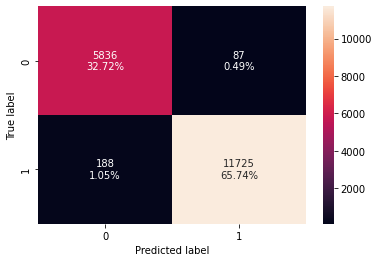

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [ ]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.984582  0.984219   0.992635  0.988409


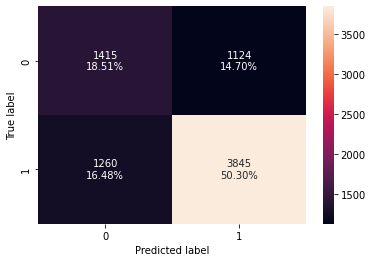

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [ ]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.688121  0.753183   0.773798  0.763351


Bagging classifier with class weights is overfitting on the training set and is performing poorly on the test set in all parameters.

**Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

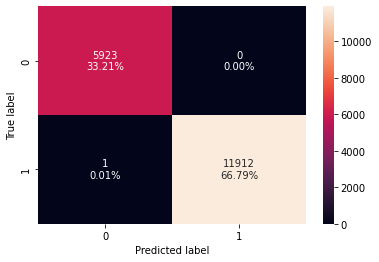

In [ ]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


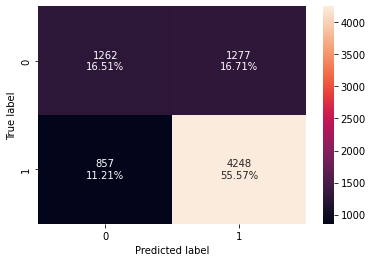

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [ ]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


Random Forest is overfitting on the training set and is performing poorly on the test set in all parameters.

**Random Forest with Class weights**

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.33,1:0.67}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

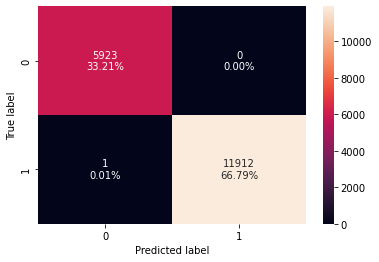

In [ ]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [ ]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


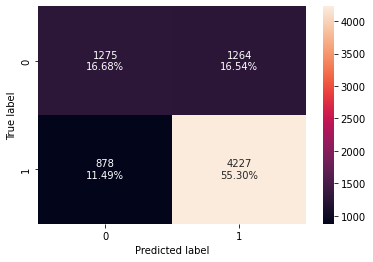

In [ ]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [ ]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.71978  0.828012   0.769805  0.797848


Random Forest with class weights is overfitting on the training set and is performing poorly on the test set in all parameters.

### **Tuning Models**

**Tuning Decision Tree**

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.33,1:0.67},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=9,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

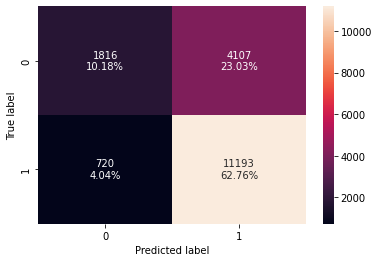

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [ ]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.729368  0.939562   0.731569  0.822622


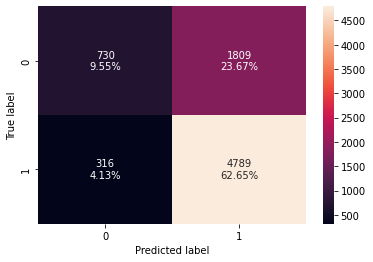

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [ ]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.722004  0.9381   0.725826  0.818423


Overfitting in the decision tree has been reduced & is performing well in Recall.

**Tuning Bagging Classifier**

In [ ]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.33,1:0.67},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'f1', cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.67},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

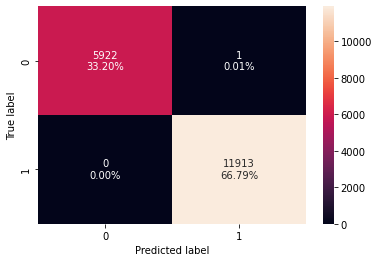

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_train,y_train)

In [ ]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958


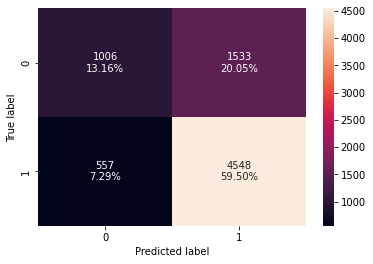

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [ ]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.726583  0.890891   0.747903  0.813159


The hypertuned bagging model continues to overfit in the training data & doesn't generalize in the test data.

**Tuning Random Forest**

In [ ]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
        "n_estimators": [15,20,25],
        "min_samples_leaf": [5,7],
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='f1',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.9, min_samples_leaf=7,
                       n_estimators=20, random_state=1)

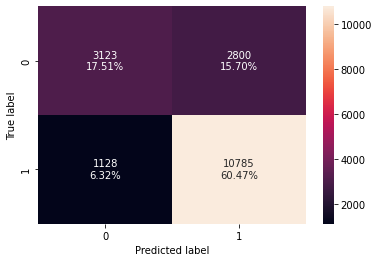

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

In [ ]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.779771  0.905314    0.79389  0.845949


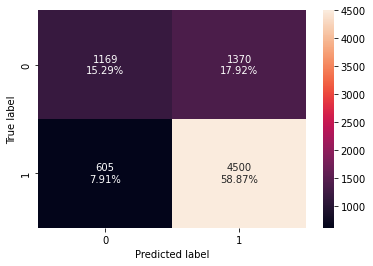

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [ ]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.741627  0.881489    0.76661  0.820046


The hypertuned random forest model is performing well in training & testing data & good imporvement is seen the F1 score in comparison to the
random forest with class weight model.




### **Building Boosting Models**

**AdaBoost Classifier**

In [ ]:
abc=AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

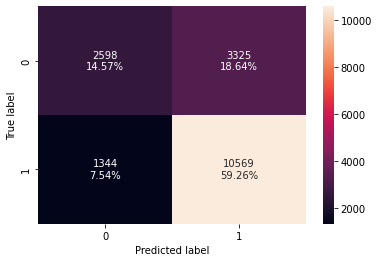

In [ ]:
confusion_matrix_sklearn(abc,X_train,y_train)

In [ ]:
abc_score_train_perf=model_performance_classification_sklearn(abc,X_train,y_train)
print('Training Performance:\n',abc_score_train_perf)

Training Performance:
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


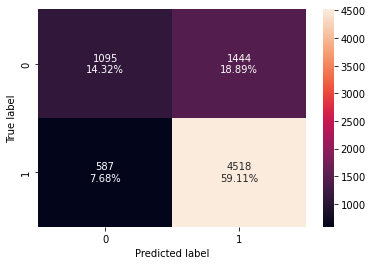

In [ ]:
confusion_matrix_sklearn(abc,X_test,y_test)

In [ ]:
abc_score_test_perf=model_performance_classification_sklearn(abc,X_test,y_test)
print('Training Performance:\n',abc_score_test_perf)

Training Performance:
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


The Adaboost model is generalizing well and good performance is seen in Recall & F1 parameter.

**Gradient Boosting Classifier**

In [ ]:
gbc=GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

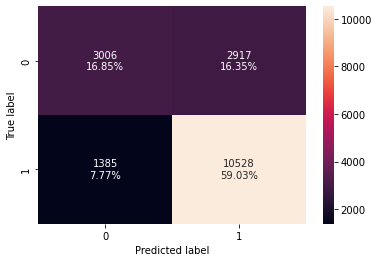

In [ ]:
confusion_matrix_sklearn(gbc,X_train,y_train)

In [ ]:
gbc_train_perf=model_performance_classification_sklearn(gbc,X_train,y_train)
print('Training Performance:\n',gbc_train_perf)

Training Performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


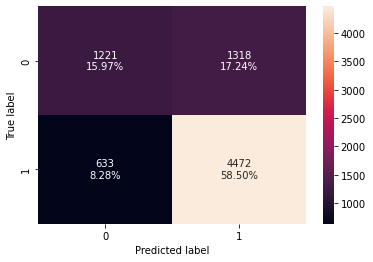

In [ ]:
confusion_matrix_sklearn(gbc,X_test,y_test)

In [ ]:
gbc_test_perf=model_performance_classification_sklearn(gbc,X_test,y_test)
print('Testing Performance:\n',gbc_test_perf)

Testing Performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


The Gradient Boosting Model is performing well both on training & testing data.But the testing data values are lesser by 0.01 with reference to the training data.

**XG Boost Classifier**

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

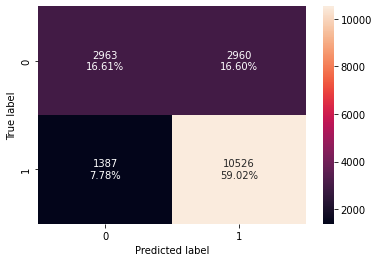

In [ ]:
confusion_matrix_sklearn(xgb,X_train,y_train)

In [ ]:
xgb_train_perf=model_performance_classification_sklearn(xgb,X_train,y_train)
print('Training Performance:\n',xgb_train_perf)

Training Performance:
    Accuracy    Recall  Precision        F1
0  0.756279  0.883573   0.780513  0.828852


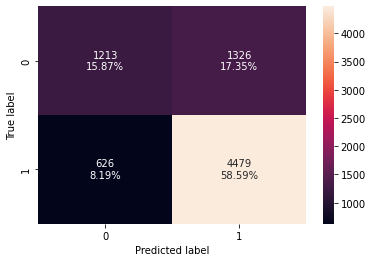

In [ ]:
confusion_matrix_sklearn(xgb,X_test,y_test)

In [ ]:
xgb_test_perf=model_performance_classification_sklearn(xgb,X_test,y_test)
print('Testing Performance:\n',xgb_test_perf)

Testing Performance:
    Accuracy    Recall  Precision        F1
0  0.744636  0.877375   0.771576  0.821082


The XGB model is generalizing well & good performance is seen in Recall & F1.

**Tuned Boosting Models**

**AdaBoost Tuned**

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1)],
    "n_estimators": np.arange(70,110,10),
    "learning_rate":np.arange(0.1,0.4,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

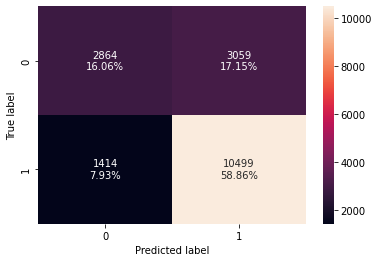

In [ ]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [ ]:
abc_tuned_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print('Training Performance:\n',abc_tuned_train_perf)

Training Performance:
    Accuracy    Recall  Precision        F1
0  0.749215  0.881306   0.774377  0.824389


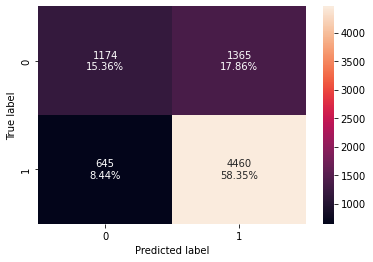

In [ ]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [ ]:
abc_tuned_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print('Training Performance:\n',abc_tuned_test_perf)

Training Performance:
    Accuracy    Recall  Precision        F1
0  0.737049  0.873653   0.765665  0.816102


The AdaBoost tuned model is performimg well on training & test data & giving good results.

Gradient Boosting Tuned

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [200,250],
    "subsample":[0.9,1],
    "max_features":[0.8,0.9,1],
    "learning_rate": np.arange(0.1, 0.21, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

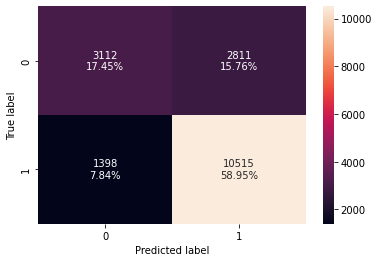

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [ ]:
gbc_tuned_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training Performance:\n",gbc_tuned_train_perf)

Training Performance:
    Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234


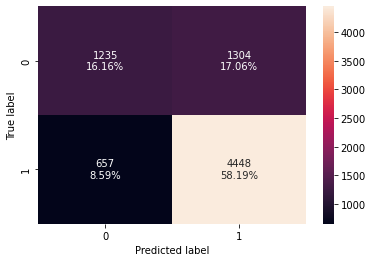

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [ ]:
gbc_tuned_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing Performance:\n",gbc_tuned_test_perf)

Testing Performance:
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


The Gradient Boost Tuned model is generalizing well & giving good results as well.

**XG Boost Tuned**

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(150,250,50),
    "scale_pos_weight":[1,2],
    "subsample":[0.9,1],
    "learning_rate":np.arange(0.1,0.21,0.1),
    "gamma":[3,5],
    "colsample_bytree":[0.8,0.9],
    "colsample_bylevel":[0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

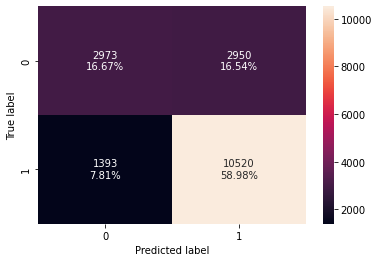

In [ ]:
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [ ]:
xgb_tuned_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training Performance:\n",xgb_tuned_train_perf)

Training Performance:
    Accuracy    Recall  Precision        F1
0  0.756504  0.883069   0.780995  0.828901


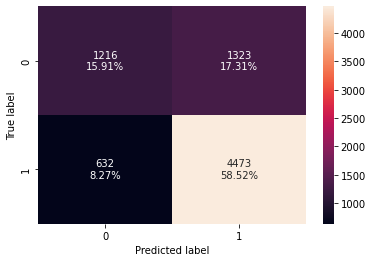

In [ ]:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [ ]:
xgb_tuned_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing Performance:\n",xgb_tuned_test_perf)

Testing Performance:
    Accuracy  Recall  Precision        F1
0  0.744244  0.8762   0.771739  0.820659


The XGBoost tuned model is giving good results.

**Stacking**

In [ ]:
estimators=[
    ('Adaboost Tuned', abc_tuned),
    ('Random Forest Tuned', rf_estimator),
    ('Gradient Boosting Tuned', gbc_tuned)]
final_estimator=xgb_tuned

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Adaboost Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Random Forest Tuned',
                                RandomForestClassifier(max_features='log2',
                                                       max_samples=0.9,
                                                       min_samples_leaf=7,
                                                       n_estimators=20,
                                                       random_state=1)),
                               ('Gradient Boosting Tuned',
                           

In [ ]:
stacking_estimator_model_train_perf = model_performance_classification_sklearn(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.768838  0.887434   0.791673  0.836823


In [ ]:
stacking_estimator_model_test_perf = model_performance_classification_sklearn(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.745814  0.874437   0.774194  0.821268


The Stacking model is generalizing well & of all the models has the highest F1.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T,abc_score_train_perf.T,gbc_train_perf.T,xgb_train_perf.T,abc_tuned_train_perf.T,gbc_tuned_train_perf.T,
     xgb_tuned_train_perf.T,stacking_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",'AdaBoost with default paramters',
    "Gradient Boosting with default parameters",
    "XGBoost with default parameters",
    'AdaBoost Tuned',
    'Gradient Boosting Tuned',
    'XGBoost Tuned',
    'Stacking']
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Bagging Classifier,0.985198,0.985982,0.991810,0.988887
Weighted Bagging Classifier,0.984582,0.984219,0.992635,0.988409
Random Forest Classifier,0.999944,0.999916,1.000000,0.999958
Weighted Random Forest Classifier,0.999944,0.999916,1.000000,0.999958
Decision Tree Estimator,0.729368,0.939562,0.731569,0.822622
Bagging Estimator,0.999944,1.000000,0.999916,0.999958
Random Forest Estimator,0.779771,0.905314,0.793890,0.845949
AdaBoost with default paramters,0.738226,0.887182,0.760688,0.819080
Gradient Boosting with default parameters,0.758802,0.883740,0.783042,0.830349


Almost all the bagging models with the exception of tuned decision tree & tuned random forest are overfitting.
All the boosting models are generalizing well.

In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,abc_score_test_perf.T,gbc_test_perf.T,xgb_test_perf.T,abc_tuned_test_perf.T,gbc_tuned_test_perf.T,
     xgb_tuned_test_perf.T,stacking_estimator_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",'AdaBoost with default paramters',
    "Gradient Boosting with default parameters",
    "XGBoost with default parameters",
    'AdaBoost Tuned',
    'Gradient Boosting Tuned',
    'XGBoost Tuned',
    'Stacking']
print("Testing performance comparison:")
models_test_comp_df.T

Testing performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree,0.651622,0.728501,0.744396,0.736363
Bagging Classifier,0.691523,0.764153,0.771711,0.767913
Weighted Bagging Classifier,0.688121,0.753183,0.773798,0.763351
Random Forest Classifier,0.720827,0.832125,0.768869,0.799247
Weighted Random Forest Classifier,0.719780,0.828012,0.769805,0.797848
Decision Tree Estimator,0.722004,0.938100,0.725826,0.818423
Bagging Estimator,0.726583,0.890891,0.747903,0.813159
Random Forest Estimator,0.741627,0.881489,0.766610,0.820046
AdaBoost with default paramters,0.734301,0.885015,0.757799,0.816481
Gradient Boosting with default parameters,0.744767,0.876004,0.772366,0.820927


Amongst the Bagging Models it can be seen that,
- All the tuned models,i.e,the Decision tree estimator, Bagging estimator & Random Forest estimator are performing better than their untuned counterparts.
- Of all the bagging models,the Random Forest estimator has the highest F1 at 0.820 .

Amongst the Boosting models, it can be seen that,
- Performance of the tuned models,i.e,the AdaBoost Tuned, Gradient Boosting Tuned & XGBoost Tuned is similar to that of their counterparts with default parameters.
- Of all the boosting models XGBoost models with default parameters have the highest F1 of 0.821.

We will be taking XGBoost with default parameters as the model for our predictions as it has the highest F1.

### **Feature Importance**

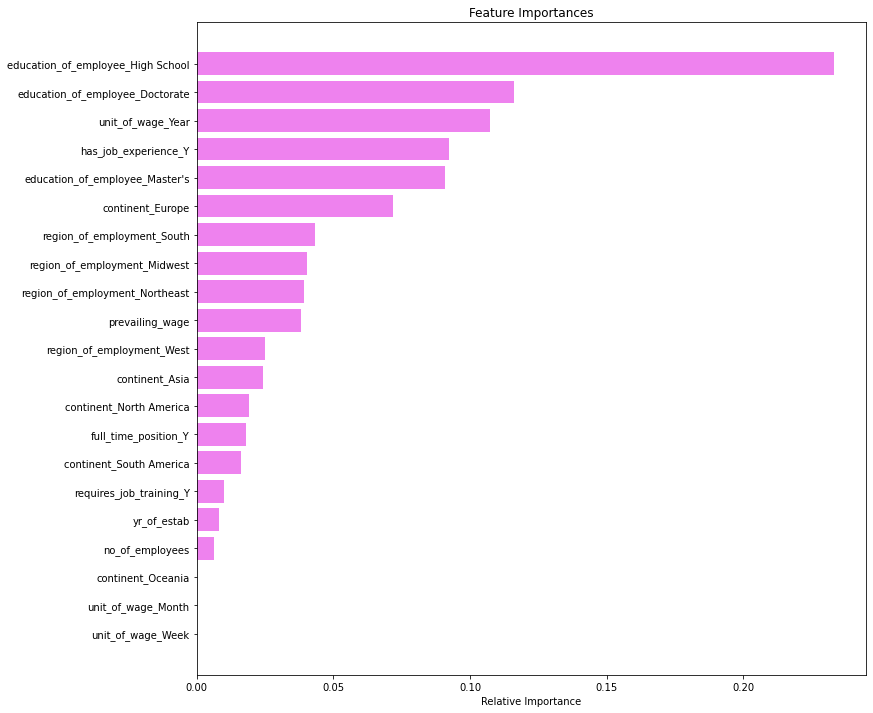

In [ ]:
feature_names = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The education of the employee high school is the most important feature followed by education of employee doctorate ,yearly unit of wage &  if the employee has job experience.

## Actionable Insights and Recommendations

1) We have built a predicatable model that can predict
- which employee will be more probable to have their US visa approval
- the drivers for visa approval/certification based on which OFLC can shortlist candidates who have higher changes of visa approval

2) The factors that drive visa approval are education of the employee, unit of wage & job experience.

3) Education of Employee: Employees who have completed High school have higher chances of getting their visa approved followed by those who have completed their Doctorate & Master degrees. OFLC should shortlist those applicants have minimum completed their high school degree.

4) Unit of wage: Those employees whose unit of wage is Yearly have higher chances of visa approval.OFLC can shortlist these applicants on priority.

5) Job Experience: Employees who have job experience have higher chances of visa approval.

6) Continent: Employees who are applying from Europe, Asia,North America & South America in that sequence have higher chances of getting their visa approved.

7) Region of Employment: Employees who intend to work in South, Midwest & Northeast have higher chances of visa approval.

OFLC can put up a basic requirement that only those applicants who have minimum high school education & previous job experience are eligible to apply for visa. This will reduce the no. of incoming applications thus reducing the load on OFLC as only those that have higher chances of approval will be recieved by OFLC.

